In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-student-performance-from-game-play/sample_submission.csv
/kaggle/input/predict-student-performance-from-game-play/train_labels.csv
/kaggle/input/predict-student-performance-from-game-play/train.csv
/kaggle/input/predict-student-performance-from-game-play/test.csv
/kaggle/input/predict-student-performance-from-game-play/jo_wilder_310/competition.cpython-310-x86_64-linux-gnu.so
/kaggle/input/predict-student-performance-from-game-play/jo_wilder_310/__init__.py
/kaggle/input/predict-student-performance-from-game-play/jo_wilder/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/predict-student-performance-from-game-play/jo_wilder/__init__.py


In [16]:
df = pd.read_csv("/kaggle/input/predict-student-performance-from-game-play/sample_submission.csv")

In [116]:
d = pd.read_csv("/kaggle/input/predict-student-performance-from-game-play/train_labels.csv")

In [117]:
d

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090312455206810_q1,1
3,20090313091715820_q1,0
4,20090313571836404_q1,1
...,...,...
424111,22100215342220508_q18,1
424112,22100215460321130_q18,1
424113,22100217104993650_q18,1
424114,22100219442786200_q18,1


In [119]:
d.head()

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090312455206810_q1,1
3,20090313091715820_q1,0
4,20090313571836404_q1,1


In [120]:
df.tail()

,session_id,correct,session_level
49,20090312143683264_q17,0,5
50,20090312331414616_q17,0,8
51,20090109393214576_q18,0,2
52,20090312143683264_q18,0,5
53,20090312331414616_q18,0,8


In [20]:
df1 = pd.read_csv("/kaggle/input/predict-student-performance-from-game-play/train_labels.csv")

In [21]:
df1

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090312455206810_q1,1
3,20090313091715820_q1,0
4,20090313571836404_q1,1
...,...,...
424111,22100215342220508_q18,1
424112,22100215460321130_q18,1
424113,22100217104993650_q18,1
424114,22100219442786200_q18,1


In [22]:
df2 = pd.read_csv("/kaggle/input/predict-student-performance-from-game-play/test.csv")

In [23]:
df2

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
0,20090109393214576,0,0,cutscene_click,basic,0,NaN,-413.991405,75.685314,380.0,...,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,0
1,20090109393214576,1,1965,person_click,basic,0,NaN,-105.991405,-63.314686,688.0,...,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
2,20090109393214576,2,3614,person_click,basic,0,NaN,-418.991405,47.685314,375.0,...,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
3,20090109393214576,3,5330,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
4,20090109393214576,4,6397,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723,20090312331414616,1001,1581679,map_hover,basic,22,NaN,NaN,NaN,NaN,...,484.0,NaN,tunic.wildlife,tunic.historicalsociety.entry,NaN,0,0,1,13-22,8
3724,20090312331414616,1002,1583044,map_hover,basic,22,NaN,NaN,NaN,NaN,...,783.0,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,0,0,1,13-22,8
3725,20090312331414616,1003,1583410,map_click,undefined,22,NaN,483.726363,-3.880047,456.0,...,NaN,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,0,0,1,13-22,8
3726,20090312331414616,1004,1585841,navigate_click,undefined,22,NaN,192.372139,38.216178,383.0,...,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,0,0,1,13-22,8


In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
correct,54.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
session_level,54.0,4.111111,2.559972,0.0,2.0,4.0,7.0,8.0


In [63]:
df2.isna().sum()

session_id           0
index                0
elapsed_time         0
event_name           0
name                 0
level                0
page              3575
room_coor_x        362
room_coor_y        362
screen_coor_x      362
screen_coor_y      362
hover_duration    3375
text              2566
fqid              1223
room_fqid            0
text_fqid         2566
fullscreen           0
hq                   0
music                0
level_group          0
session_level        0
dtype: int64

In [64]:
df2.head(10)

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
0,20090109393214576,0,0,cutscene_click,basic,0,NaN,-413.991405,75.685314,380.0,...,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,0
1,20090109393214576,1,1965,person_click,basic,0,NaN,-105.991405,-63.314686,688.0,...,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
2,20090109393214576,2,3614,person_click,basic,0,NaN,-418.991405,47.685314,375.0,...,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
3,20090109393214576,3,5330,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
4,20090109393214576,4,6397,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
5,20090109393214576,5,8864,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,"Sure thing, Jo. Grab your notebook and come up...",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
6,20090109393214576,6,11697,person_click,basic,0,NaN,571.276982,-107.175714,683.0,...,NaN,"See you later, Teddy.",teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4,0
7,20090109393214576,7,12898,person_click,basic,0,NaN,578.242987,-107.684799,683.0,...,NaN,I get to go to Gramps's meeting!,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4,0
8,20090109393214576,8,13847,person_click,basic,0,NaN,578.963685,-107.737468,683.0,...,NaN,Now where did I put my notebook?,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4,0
9,20090109393214576,9,16847,person_click,basic,0,NaN,534.117184,-92.748686,638.0,...,NaN,\u00f0\u0178\u02dc\u00b4,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4,0


In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3728 entries, 0 to 3727
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   session_id      3728 non-null   int64  
 1   index           3728 non-null   int64  
 2   elapsed_time    3728 non-null   int64  
 3   event_name      3728 non-null   object 
 4   name            3728 non-null   object 
 5   level           3728 non-null   int64  
 6   page            153 non-null    float64
 7   room_coor_x     3366 non-null   float64
 8   room_coor_y     3366 non-null   float64
 9   screen_coor_x   3366 non-null   float64
 10  screen_coor_y   3366 non-null   float64
 11  hover_duration  353 non-null    float64
 12  text            1162 non-null   object 
 13  fqid            2505 non-null   object 
 14  room_fqid       3728 non-null   object 
 15  text_fqid       1162 non-null   object 
 16  fullscreen      3728 non-null   int64  
 17  hq              3728 non-null   i

In [74]:
df.isnull()

,session_id,correct,session_level
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [75]:
df.notnull()

,session_id,correct,session_level
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
5,True,True,True
6,True,True,True
7,True,True,True
8,True,True,True
9,True,True,True


In [76]:
df.isna()

,session_id,correct,session_level
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [77]:
df2.isnull()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
0,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
3724,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
3725,False,False,False,False,False,False,True,False,False,False,...,True,True,False,False,True,False,False,False,False,False
3726,False,False,False,False,False,False,True,False,False,False,...,True,True,False,False,True,False,False,False,False,False


In [79]:
df2.notnull()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
0,True,True,True,True,True,True,False,True,True,True,...,False,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,False,True,True,True,...,False,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,False,True,True,True,...,False,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,False,True,True,True,...,False,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,False,True,True,True,...,False,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723,True,True,True,True,True,True,False,False,False,False,...,True,False,True,True,False,True,True,True,True,True
3724,True,True,True,True,True,True,False,False,False,False,...,True,False,True,True,False,True,True,True,True,True
3725,True,True,True,True,True,True,False,True,True,True,...,False,False,True,True,False,True,True,True,True,True
3726,True,True,True,True,True,True,False,True,True,True,...,False,False,True,True,False,True,True,True,True,True


In [80]:
df2.isna()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
0,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
3724,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
3725,False,False,False,False,False,False,True,False,False,False,...,True,True,False,False,True,False,False,False,False,False
3726,False,False,False,False,False,False,True,False,False,False,...,True,True,False,False,True,False,False,False,False,False


In [82]:
df2.notna()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
0,True,True,True,True,True,True,False,True,True,True,...,False,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,False,True,True,True,...,False,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,False,True,True,True,...,False,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,False,True,True,True,...,False,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,False,True,True,True,...,False,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723,True,True,True,True,True,True,False,False,False,False,...,True,False,True,True,False,True,True,True,True,True
3724,True,True,True,True,True,True,False,False,False,False,...,True,False,True,True,False,True,True,True,True,True
3725,True,True,True,True,True,True,False,True,True,True,...,False,False,True,True,False,True,True,True,True,True
3726,True,True,True,True,True,True,False,True,True,True,...,False,False,True,True,False,True,True,True,True,True


In [83]:
df.notna()

,session_id,correct,session_level
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
5,True,True,True
6,True,True,True
7,True,True,True
8,True,True,True
9,True,True,True


In [96]:
df2.dropna(how='all',axis='columns')

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
0,20090109393214576,0,0,cutscene_click,basic,0,NaN,-413.991405,75.685314,380.0,...,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,0
1,20090109393214576,1,1965,person_click,basic,0,NaN,-105.991405,-63.314686,688.0,...,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
2,20090109393214576,2,3614,person_click,basic,0,NaN,-418.991405,47.685314,375.0,...,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
3,20090109393214576,3,5330,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
4,20090109393214576,4,6397,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723,20090312331414616,1001,1581679,map_hover,basic,22,NaN,NaN,NaN,NaN,...,484.0,NaN,tunic.wildlife,tunic.historicalsociety.entry,NaN,0,0,1,13-22,8
3724,20090312331414616,1002,1583044,map_hover,basic,22,NaN,NaN,NaN,NaN,...,783.0,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,0,0,1,13-22,8
3725,20090312331414616,1003,1583410,map_click,undefined,22,NaN,483.726363,-3.880047,456.0,...,NaN,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,0,0,1,13-22,8
3726,20090312331414616,1004,1585841,navigate_click,undefined,22,NaN,192.372139,38.216178,383.0,...,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,0,0,1,13-22,8


In [101]:
df2.fillna(value=1)

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
0,20090109393214576,0,0,cutscene_click,basic,0,1.0,-413.991405,75.685314,380.0,...,1.0,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,0
1,20090109393214576,1,1965,person_click,basic,0,1.0,-105.991405,-63.314686,688.0,...,1.0,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
2,20090109393214576,2,3614,person_click,basic,0,1.0,-418.991405,47.685314,375.0,...,1.0,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
3,20090109393214576,3,5330,person_click,basic,0,1.0,-110.991405,-57.314686,683.0,...,1.0,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
4,20090109393214576,4,6397,person_click,basic,0,1.0,-110.991405,-57.314686,683.0,...,1.0,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723,20090312331414616,1001,1581679,map_hover,basic,22,1.0,1.000000,1.000000,1.0,...,484.0,1,tunic.wildlife,tunic.historicalsociety.entry,1,0,0,1,13-22,8
3724,20090312331414616,1002,1583044,map_hover,basic,22,1.0,1.000000,1.000000,1.0,...,783.0,1,tunic.capitol_2,tunic.historicalsociety.entry,1,0,0,1,13-22,8
3725,20090312331414616,1003,1583410,map_click,undefined,22,1.0,483.726363,-3.880047,456.0,...,1.0,1,tunic.capitol_2,tunic.historicalsociety.entry,1,0,0,1,13-22,8
3726,20090312331414616,1004,1585841,navigate_click,undefined,22,1.0,192.372139,38.216178,383.0,...,1.0,1,chap4_finale_c,tunic.capitol_2.hall,1,0,0,1,13-22,8


AttributeError: 'DataFrame' object has no attribute 'wilder'

In [112]:
df2.fillna(9)

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
0,20090109393214576,0,0,cutscene_click,basic,0,9.0,-413.991405,75.685314,380.0,...,9.0,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,0
1,20090109393214576,1,1965,person_click,basic,0,9.0,-105.991405,-63.314686,688.0,...,9.0,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
2,20090109393214576,2,3614,person_click,basic,0,9.0,-418.991405,47.685314,375.0,...,9.0,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
3,20090109393214576,3,5330,person_click,basic,0,9.0,-110.991405,-57.314686,683.0,...,9.0,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
4,20090109393214576,4,6397,person_click,basic,0,9.0,-110.991405,-57.314686,683.0,...,9.0,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723,20090312331414616,1001,1581679,map_hover,basic,22,9.0,9.000000,9.000000,9.0,...,484.0,9,tunic.wildlife,tunic.historicalsociety.entry,9,0,0,1,13-22,8
3724,20090312331414616,1002,1583044,map_hover,basic,22,9.0,9.000000,9.000000,9.0,...,783.0,9,tunic.capitol_2,tunic.historicalsociety.entry,9,0,0,1,13-22,8
3725,20090312331414616,1003,1583410,map_click,undefined,22,9.0,483.726363,-3.880047,456.0,...,9.0,9,tunic.capitol_2,tunic.historicalsociety.entry,9,0,0,1,13-22,8
3726,20090312331414616,1004,1585841,navigate_click,undefined,22,9.0,192.372139,38.216178,383.0,...,9.0,9,chap4_finale_c,tunic.capitol_2.hall,9,0,0,1,13-22,8


In [ ]:
df["session"]

In [45]:
df["session_level"].describe()

count    54.000000
mean      4.111111
std       2.559972
min       0.000000
25%       2.000000
50%       4.000000
75%       7.000000
max       8.000000
Name: session_level, dtype: float64

In [54]:
df.shape

(54, 3)

In [42]:
df['session_level'].fillna("0")

0     0
1     3
2     6
3     0
4     3
5     6
6     0
7     3
8     6
9     1
10    4
11    7
12    1
13    4
14    7
15    1
16    4
17    7
18    1
19    4
20    7
21    1
22    4
23    7
24    1
25    4
26    7
27    1
28    4
29    7
30    1
31    4
32    7
33    1
34    4
35    7
36    1
37    4
38    7
39    2
40    5
41    8
42    2
43    5
44    8
45    2
46    5
47    8
48    2
49    5
50    8
51    2
52    5
53    8
Name: session_level, dtype: int64

<AxesSubplot: >

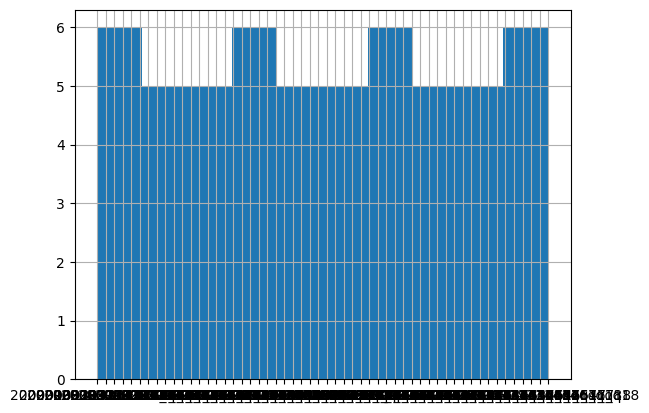

In [29]:
df['session_id'].hist()

In [46]:
df['correct'].mean()

0.0

In [70]:
current.info()

NameError: name 'current' is not defined

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   session_id     54 non-null     object
 1   correct        54 non-null     int64 
 2   session_level  54 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ KB


In [31]:
df.corr()

/tmp/ipykernel_32/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,correct,session_level
correct,NaN,NaN
session_level,NaN,1.0


In [32]:
df['session_level'].max()

8

In [33]:
df['session_level'].min()

0

array([[<AxesSubplot: title={'center': 'correct'}>,
        <AxesSubplot: title={'center': 'session_level'}>]], dtype=object)

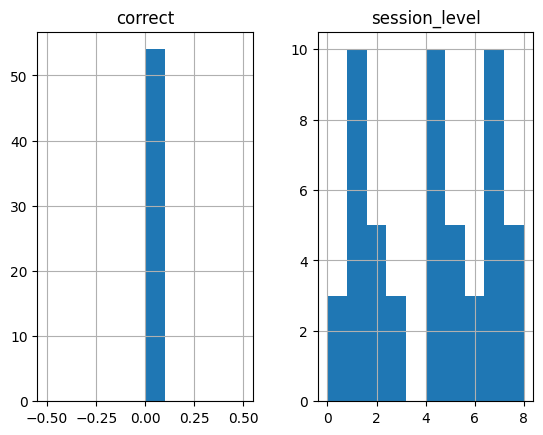

In [26]:
df.hist()

<AxesSubplot: >

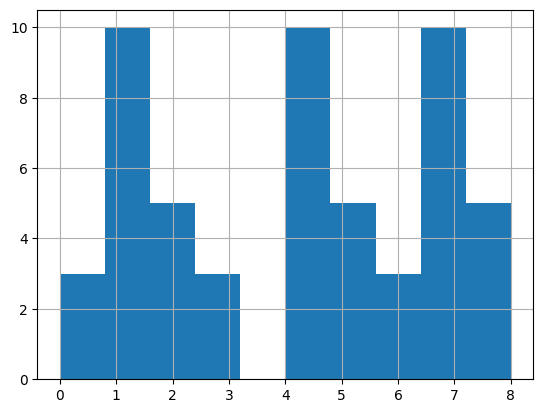

In [27]:
df['session_level'].hist()

In [24]:
df3 = pd.read_csv("/kaggle/input/predict-student-performance-from-game-play/train.csv")

In [25]:
df3

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090312455206810_q1,1
3,20090313091715820_q1,0
4,20090313571836404_q1,1
...,...,...
424111,22100215342220508_q18,1
424112,22100215460321130_q18,1
424113,22100217104993650_q18,1
424114,22100219442786200_q18,1
